In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
data = pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [25]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# plotting the graph between hours and Scores 

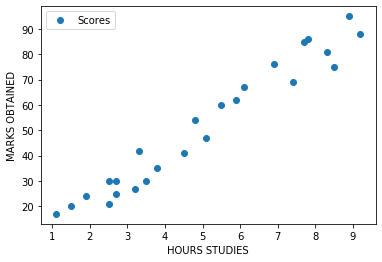

In [3]:
data.plot(x='Hours',y='Scores',style='o')
plt.xlabel('HOURS STUDIES')
plt.ylabel('MARKS OBTAINED')
plt.show()

# CORELATION BETWEEN THE VARIABLES

In [4]:
data['Hours'].corr(data['Scores'])

0.9761906560220887

ITS POSITIVE AND STRONG CORRELATION BETWEEN THE VARIABLES 

# FINDING THE OUTLIERS 

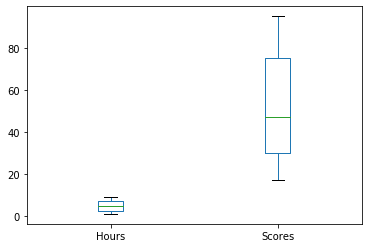

In [5]:
data.plot.box()

there are no outliers in the given data

# preparing the data

In [6]:
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [7]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0)

# training algorithm


In [8]:
from sklearn.linear_model import LinearRegression  
lreg = LinearRegression()  
lreg.fit(x_train, y_train) 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

TRAINING IS DONE

# plotting regression for the test data 


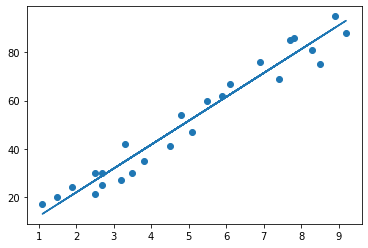

In [9]:
# Plotting the regression line
line = lreg.coef_*x+lreg.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

# predicting 

In [10]:
pred = lreg.predict(x_test)
print(pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [11]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual_values': y_test, 'Predicted_values': pred})  
df

,Actual_values,Predicted_values
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [19]:
predict_hour = [[9.25]]
pred_new = lreg.predict(predict_hour)
print(pred_new)


[93.69173249]


THE PREDICTED SCORE IF THE STUDENT STUDIES FOR 9.25 HOURS IS 93.69 MARKS

# PERFORMANCE OF THE MODEL 

In [20]:
lreg.score(x_test,y_test)

0.9454906892105356

In [22]:
lreg.score(x_train , y_train)

0.9515510725211553

HERE THE SCORE OF THE TEST AND TRAIN ARE CLOSE TO EACH OTHER . THE MODEL FITTS PERFECTLY . AND THE TEST DATA REPRESENT THE TRAIN DATA SET. 

# EVALUATING THE MODEL


In [23]:
from sklearn import metrics  
print(metrics.mean_absolute_error(y_test, pred)) 

4.183859899002975


THE ROOT MEAN SQUARE VALUEE IS 4.183 WHICH IS PRETTY MUCH  LOW . HENCE THE MODEL FITTS WELL